<a href="https://colab.research.google.com/github/silviolima07/colab_ngrok_mlflow_pycaret/blob/main/COLAB_MLFLOW_NGROK_PYCARET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprender sempre.
# Não se compare a ninguém, apenas com vc mesmo.
# Seja melhor do que era na semana passada.

![](https://drive.google.com/uc?export=view&id=1TN75Ukq4kG-8JL9Or6W88hnKgQNV-_Fw)

# No dia-dia após coletar os dados, iniciamos o processo de análise exploratória dos dados, tratamentos dos dados, treinamento do modelo, avaliação do modelo e por fim salvamos o melhor modelo.
# Ao final precisamos salvar as features mais relevantes, os parametros utilizados, os gráficos que foram gerados nas análises e outros documentos gerados durante todo o processo.
# O Mlflow pode ti auxiliar a registrar todo o processo.
# O Mlflow pode estar rodando num servidor dentro do ambente da empresa, numa porta definida.
# Nesse exemplo, a análise esta sendo feita no Colab e o mlflow rodando na porta 5000, sendo acessado via ngrok.
# O pycaret foi usando no tratamento, treinamento e seleção do melhor modelo.

# Video explicando o ngrok rodando.
https://www.youtube.com/watch?app=desktop&v=pNwnHJASuc0

# Exemplo mostrando como integrar Colab, Streamlit e ngrok.
https://blog.jcharistech.com/2020/08/16/how-to-run-streamlit-apps-from-googles-colab/

In [1]:
!pip install --q pycaret mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14

In [2]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19879 sha256=8d55e49eb44e1c42ede3be559f26929d84b7429fb061e31946fc1a92acb1dcd9
  Stored in directory: /root/.cache/pip/wheels/31/49/9c/44b13823eb256a3b4dff34b972f7a3c7d9910bfef269e59bd7
Successfully built pyngrok


In [3]:
# Pré-Processamento
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Criação do modelo
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import mlflow

from pyngrok import ngrok

In [6]:
from pycaret.classification import *

In [7]:
pd.set_option("display.precision", 3)

In [8]:
def metricas(y_test, y_predict):
    acuracia = round(accuracy_score(y_test, y_predict),3)
    precision = round(precision_score(y_test, y_predict,average='weighted'),3)
    recall = round(recall_score(y_test, y_predict,average='weighted'),3)
    f1 = round(f1_score(y_test, y_predict,average='weighted'),3)
    return acuracia, precision, recall, f1


In [9]:
def matriz_confusao(y_test, y_predict):
    matriz_conf = confusion_matrix(y_test.values.ravel(), y_predict)
    fig = plt.figure()
    ax = plt.subplot()
    sns.heatmap(matriz_conf, annot=True, cmap='Blues', ax=ax);

    ax.set_xlabel('Valor Predito');
    ax.set_ylabel('Valor Real'); 
    ax.set_title('Matriz de Confusão'); 
    ax.xaxis.set_ticklabels(['Classe 1', 'Classe 2']);
    ax.yaxis.set_ticklabels(['Classe 1', 'Classe 2']);
    plt.show()
    plt.close()
    return fig

In [10]:
data = pd.read_csv("https://raw.githubusercontent.com/ckliu1402/example_data/main/Churn_Modelling.csv")
data
     

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
# Define columns and target

exclude_columns = ['RowNumber', 'CustomerId', 'Surname']
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
target = 'Exited'

# Pycaret

In [12]:
experiment = setup(data = data,
                   ignore_features = exclude_columns,
                   numeric_features = numerical_columns,
                   categorical_features = categorical_columns,
                   target = target,
                   log_experiment = True,
                   log_plots = True,
                   experiment_name = 'mlflow_experiment'
                   )

,Description,Value
0,Session id,7431
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 14)"
4,Transformed data shape,"(10000, 13)"
5,Transformed train set shape,"(7000, 13)"
6,Transformed test set shape,"(3000, 13)"
7,Ignore features,3
8,Ordinal features,3
9,Numeric features,6


2023/04/27 13:10:51 INFO mlflow.tracking.fluent: Experiment with name 'mlflow_experiment' does not exist. Creating a new experiment.


In [13]:
## Model Selection and Optimization
model = compare_models(n_select = 1, include = ['gbc', 'rf'])
tuned_model = tune_model(model)

## Finalize model
finalized_model = finalize_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8669,0.8624,0.4776,0.7873,0.5936,0.5197,0.5434,3.7750
rf,Random Forest Classifier,0.8661,0.8476,0.4734,0.7855,0.5897,0.5157,0.5398,1.7120


Processing:   0%|          | 0/13 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.8278,0.4648,0.6600,0.5455,0.4539,0.4641
1,0.8600,0.8520,0.4507,0.7619,0.5664,0.4894,0.5134
2,0.8643,0.8558,0.4718,0.7701,0.5852,0.5096,0.5314
3,0.8586,0.8645,0.4718,0.7363,0.5751,0.4951,0.5128
4,0.8714,0.8630,0.4615,0.8354,0.5946,0.5256,0.5584
5,0.8714,0.8716,0.4825,0.8118,0.6053,0.5343,0.5602
6,0.8571,0.8173,0.4126,0.7867,0.5413,0.4663,0.5004
7,0.8686,0.8701,0.4895,0.7865,0.6034,0.5297,0.5512
8,0.8714,0.8396,0.5385,0.7624,0.6311,0.5561,0.5684


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [24]:
print(finalized_model)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CreditScore', 'Age', 'Tenure',
                                             'Balance', 'NumOfProducts',
                                             'EstimatedSalary'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                (...
                                            criterion=

# Mlflow
# Veja:
https://dev.to/ksk0629/using-mlflow-on-google-colaboratory-with-github-to-build-cosy-environment-building-jb5

https://github.com/ricardo-jr37/mlflow_tutorial/blob/master/main.ipynb

https://fmarcelneves.medium.com/deploy-r%C3%A1pido-e-tempor%C3%A1rio-de-webapps-diretamente-do-google-colab-com-ngrok-e056b977c48a

In [23]:
# run mlflow server (tracking UI) in the background
get_ipython().system_raw("mlflow ui --port 5000 &")

# Ngrok

In [15]:
ngrok.kill()

# * IMPORTANTE *
# Crie sua conta e obtenha o token necessário para o próximo passo.
 https://dashboard.ngrok.com/auth



In [16]:
# Terminate ngrok port
#ngrok.kill()
# Set authentication (optional)
# Get your authentication token via https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "YOUR TOKEN HERE"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [17]:
# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://95a4-34-132-218-237.ngrok.io


In [18]:
tags = {
        "Projeto": "Tutorial MLflow",
        "team": "Data Science",
        "dataset": "Churn"
       }

In [19]:
mlflow.end_run()

Acurácia: 0.851
Precision: 0.841
recall: 0.851
f1: 0.836


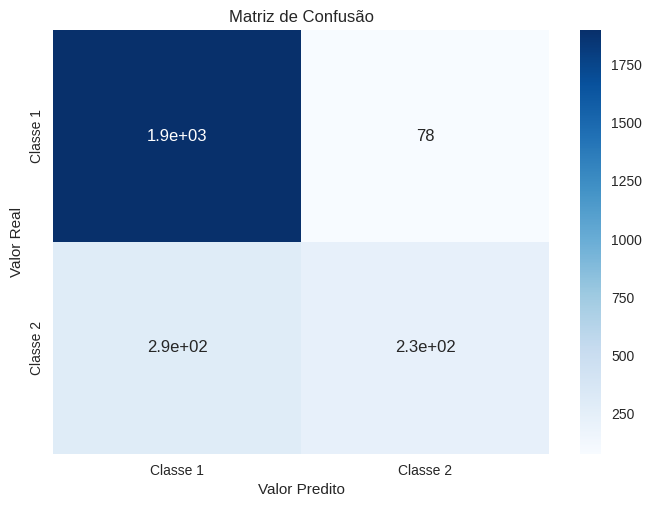

In [27]:
 # Carregando os dados 
df = data.copy()
df.drop(exclude_columns, axis=1, inplace=True)
# Separação dos dados entre treino e teste
train, test = train_test_split(df)
x_train = train.drop(columns=['Exited'])
x_test = test.drop(columns=['Exited'])
y_train = train["Exited"]
y_test = test["Exited"]
clf = finalized_model
mlflow.end_run()
# Inicializando a criação de um novo experimento     
with mlflow.start_run(run_name='ChurnClassifier'):
    #Criação do modelo
    clf.fit(x_train, y_train)
    #Load model to tracking server
    
    #Predição dos valores de testes
    pred = clf.predict(x_test)
    #Métricas
    acuracia, precision, recall, f1 = metricas(y_test, pred)
    print("Acurácia: {}\nPrecision: {}\nrecall: {}\nf1: {}".format(acuracia, precision, recall, f1))
    #Matriz de confusão
    matriz_conf = matriz_confusao(y_test, pred)
    temp_name = "confusion-matrix.png"
    
    matriz_conf.savefig(temp_name)
    mlflow.log_artifact(temp_name, "confusion-matrix-plots")
    mlflow.set_tags(tags)
    mlflow.log_param('Features', df.columns)
    mlflow.log_metric('accuracy', acuracia)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('f1', f1)
mlflow.end_run()     

# Página do Mlflow sendo acessado através do ngrok.
# Foram feitos alguns testes, os parametros vc altera e registra via mlflow.log.
# O melhor modelo encontrado pode ser salvo.
# O mlflow possue diversas opções, desde o préprocessamento dos dados, hiperparametros e etc.


------------------------------------------------------------------


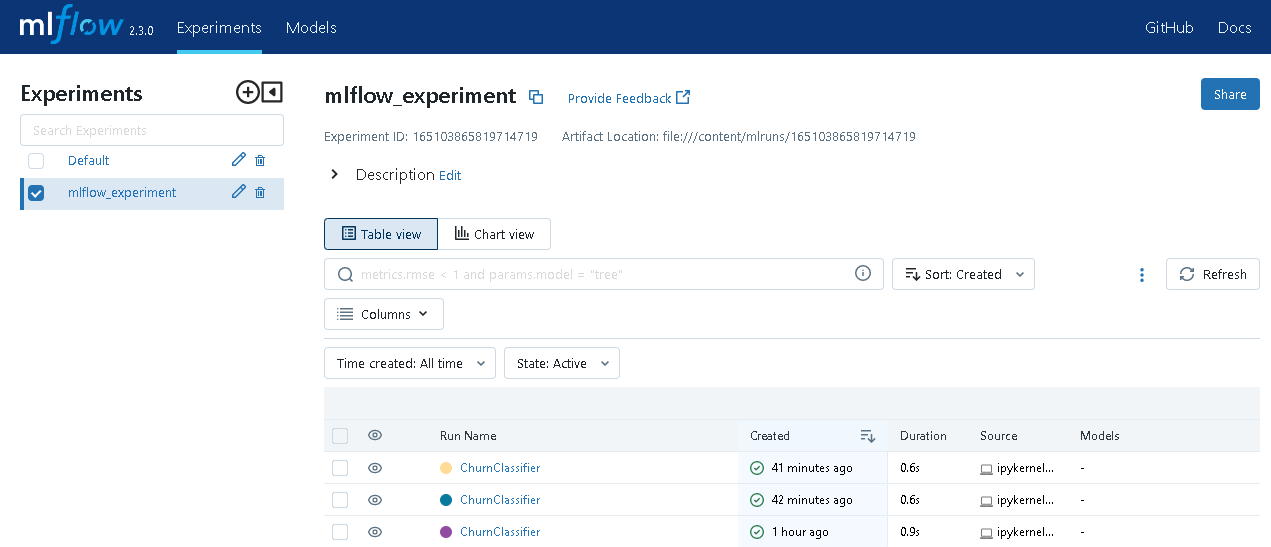


------------------------------------------------------------------


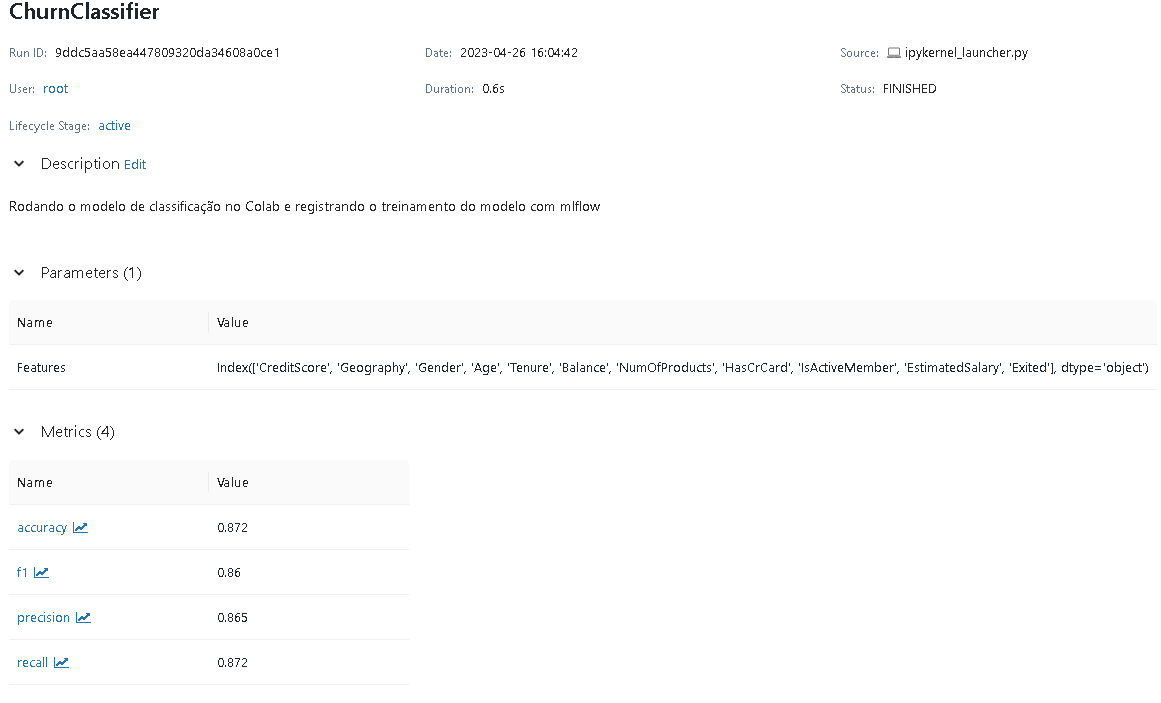

In [22]:
import cv2
from google.colab.patches import cv2_imshow


# Save image in set directory
# Read RGB image
imgs = ['/content/mlflow_1.png','/content/mlflow_2.png']
for img in imgs:
    temp = cv2.imread(img)
    print("\n------------------------------------------------------------------")
    cv2_imshow(temp)
 